NAMA : Ibnu Amuna Malik

EMAIL : amunamalik12@gmail.com/ibnu17002@mail.unpad.ac.id

Alamat : Jalan Patamon no.47, Arcamanik, Sindanglaya, Kecamatan Mandalajati, Kota Bandung , 40195

Kode ML dibawah ini bertujuan untuk memprediksi suatu gambar tangan menunjukkan bentuk batu, kertas, atau gunting. Dimana kita menggunakan dataset yang tersedia pada modul sebelumnya, dan direkayasa untuk ditambahkan fitur fitur sesuai dengan kriteria yang diharuskan. pada program ini saya menggunakan fitur wget dalam mengimpor data, namun dataset pada kode ini telah saya simpan di zip file yang telah di submit 

In [28]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [1]:
!wget --no-check-certificate https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \-O /tmp/rockpaperscissors.zip

--2021-07-19 07:34:46--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.65MB/s    in 40s     

2021-07-19 07:35:26 (7.72 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [2]:
# melakukan ekstraksi pada file zip dataset 
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir, 'train') #membuat direktori training
valid_dir = os.path.join(base_dir, 'val') #membuat direktori validasi (test)

In [3]:
os.listdir('/tmp/rockpaperscissors') #belum terdapat direktori file train dan validation, maka harus dibuat ulang dengan mkdir

['scissors', 'rps-cv-images', 'rock', 'paper', 'README_rpc-cv-images.txt']

In [4]:
 os.mkdir(train_dir) #apabila train_dir dan val_dir belum dibuat pada kode sebelumnya, dapat digunakan kode ini 
 os.mkdir(valid_dir) 

In [5]:
os.listdir('/tmp/rockpaperscissors') #mengecek direktori baru apakah train_dir dan valid_dir sudah ada

['train',
 'val',
 'scissors',
 'rps-cv-images',
 'rock',
 'paper',
 'README_rpc-cv-images.txt']

In [7]:
rock_dir = os.path.join('/tmp/rockpaperscissors/rock') #mendeklarasi direktori untuk batu gunting kertas untuk nantinya dibuat direktori train dan val untuk setiap kategori
paper_dir = os.path.join('/tmp/rockpaperscissors/paper')
scissors_dir = os.path.join('/tmp/rockpaperscissors/scissors')

In [8]:
from sklearn.model_selection import train_test_split #mengimpor library sklearn untuk melatih dataset

In [10]:
#memisahkan direktori train dan validation(test)
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.2) # 20% persyaratan dari dataset untuk setiap kategori 
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.2)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.2)

train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')

val_rock = os.path.join(valid_dir, 'rock')
val_paper = os.path.join(valid_dir, 'paper')
val_scissors = os.path.join(valid_dir, 'scissors')

In [11]:
os.listdir('/tmp/rockpaperscissors/train') #mengecek apakah didalam direktori train sudah terdapat file gunting kertas batu

[]

In [12]:
os.listdir('/tmp/rockpaperscissors/val')

[]

In [13]:
os.mkdir(train_rock)
os.mkdir(train_paper)
os.mkdir(train_scissors)
os.mkdir(val_rock)
os.mkdir(val_paper)
os.mkdir(val_scissors)

In [14]:
os.listdir('/tmp/rockpaperscissors/train')

['scissors', 'rock', 'paper']

In [15]:
os.listdir('/tmp/rockpaperscissors/val')

['scissors', 'rock', 'paper']

In [16]:
len(os.listdir('/tmp/rockpaperscissors/train/rock')) #melihat apakah file dataset sudah terimpor kedalam direktori train dan val 

0

In [17]:
len(os.listdir('/tmp/rockpaperscissors/val/rock')) 

0

In [18]:
import shutil

# mengkopi data train dari direktori kategori masing masing ( gunting kertas batu)
for i in train_rock_dir:
    shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
    shutil.copy(os.path.join(paper_dir, i), os.path.join(train_paper, i))
for i in train_scissors_dir:
    shutil.copy(os.path.join(scissors_dir, i), os.path.join(train_scissors, i))

# mengkopi data train
for i in val_rock_dir:
    shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock, i))
for i in val_paper_dir:
    shutil.copy(os.path.join(paper_dir, i), os.path.join(val_paper, i))
for i in val_scissors_dir:
    shutil.copy(os.path.join(scissors_dir, i), os.path.join(val_scissors, i))

In [19]:
len(os.listdir('/tmp/rockpaperscissors/train/rock')) # dataset sudah terimpor 

580

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator #mengimpor library imagedataprocessors and optimizers pada tensorflow.keras
from tensorflow.keras.optimizers import RMSprop

In [25]:
#Image Data Generator
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'wrap', 
)
test_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'wrap', 
)

In [26]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150,150),
        batch_size=32,
        class_mode='categorical', #kategorikal karena terdapat lebih dari 2 kelas
        shuffle=True
        )

validation_generator = train_datagen.flow_from_directory(
        valid_dir,
        target_size=(150,150),
        batch_size=32,
        class_mode='categorical'
        )

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2), # penggunaan maxpooling dan conv2d
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax') # menggunakan aktivasi softmax karena multiclass, sigmoid digunakan untuk binary 
])

In [31]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [32]:
# compile model dengan 'adam' optimizer loss function 'categorical_crossentropy' karena ia multiclass
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

# latih model dengan model.fit 
history = model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=20,callbacks=[callbacks],
    validation_data=validation_generator,
    validation_steps=5,
    verbose=2)

Epoch 1/20
25/25 - 37s - loss: 0.9477 - accuracy: 0.5188 - val_loss: 0.7510 - val_accuracy: 0.7125
Epoch 2/20
25/25 - 8s - loss: 0.5041 - accuracy: 0.8275 - val_loss: 0.3429 - val_accuracy: 0.8750
Epoch 3/20
25/25 - 8s - loss: 0.2913 - accuracy: 0.8900 - val_loss: 0.3329 - val_accuracy: 0.8687
Epoch 4/20
25/25 - 8s - loss: 0.2650 - accuracy: 0.9062 - val_loss: 0.2966 - val_accuracy: 0.8750

Akurasi telah mencapai >90%!


Saving 2affjOmZChc9AXpR.png to 2affjOmZChc9AXpR.png
2affjOmZChc9AXpR.png
this is a rock


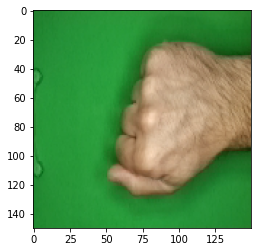

In [33]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes [0][0] == 1:
    print('this is a paper')
  elif classes [0][1] == 1:
    print('this is a rock')
  elif classes [0][2] == 1:
    print('this is a scissors')

In [34]:
classes #terdapat tiga nilai pada array classes yang di pilih menggunakan sintaks if dan elif diatas 

array([[0., 1., 0.]], dtype=float32)

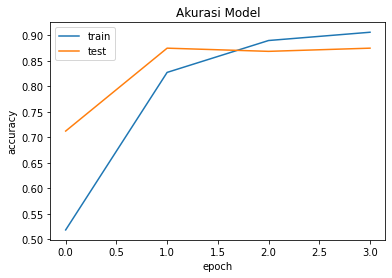

In [35]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show() #melihat akurasi dari model untuk train dan test yang telah di execute

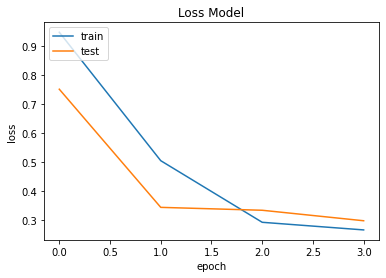

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show() # melihat model loss untuk ML yang telah di execute 

In [37]:
# mengkonversi model menjadi tflite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# menyimpan tflite model 
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp4bk5onlp/assets


In [38]:
# menyimpan as hdf5 file
model.save('my_model.pb') 
%cd

INFO:tensorflow:Assets written to: my_model.pb/assets


INFO:tensorflow:Assets written to: my_model.pb/assets


/root
